<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/Yolov3_Test_for_Movies2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import cv2 #　opencvのインポート
import matplotlib.pyplot as plt # matplotlib(描画用)

print(cv2.__version__)

4.1.2


In [2]:
#!pip install pytube
!pip install youtube-dl
!pip install ffmpeg

     |████████████████████████████████| 1.8MB 5.0MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6084 sha256=0af4132acaaf9af055a905e04e2bc9039ab9a6157393174968d1fd87849e82df
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [0]:
!rm -rf screen_caps
!mkdir screen_caps

In [0]:
# https://knooto.info/youtube-dl/#%E5%88%A9%E7%94%A8%E5%8F%AF%E8%83%BD%E3%81%AA%E5%BD%A2%E5%BC%8F%E3%81%AE%E4%B8%80%E8%A6%A7%E3%82%92%E5%87%BA%E5%8A%9B%E3%81%99%E3%82%8B

!youtube-dl https://youtu.be/l00CwQ6HI_o -F


In [0]:
!youtube-dl https://youtu.be/l00CwQ6HI_o -f 313

[youtube] l00CwQ6HI_o: Downloading webpage
[youtube] l00CwQ6HI_o: Downloading video info webpage
[download] Destination: 20190224 鹿屋体育大学 vs 鹿児島高専 1st-l00CwQ6HI_o.webm
[download] 100% of 3.34GiB in 15:24


In [0]:
import sys
import cv2
import numpy as np

#動画ファイルを読み込む
#file_name = u"20190217 徳島大学医学部 vs 吉野クラブ 2nd No2.mp4"
#file_name = u"20190224 鹿屋体育大学 vs 鹿児島高専 1st.mp4"
file_name = u"/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st.webm"
cap = cv2.VideoCapture(file_name)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(str(width) + ', ' + str(height))
fps = cap.get(cv2.CAP_PROP_FPS)

#(width, height) = (1280, 720)
print(str(width) + ', ' + str(height))
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter('T20190224_1st.mp4', fourcc, fps, (width, height), True)

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('frame_count = ' + str(frame_count))

frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
print('frame_rate = ' + str(frame_rate))

#while True:
for i in range(frame_count):
	#_, frame = cap.read()
	ret, frame = cap.read()
	if not ret:
		break

	pts1 = np.float32([[1110, 486], [2700, 486], [-90, 1080], [3870, 1080]])
	pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
	matrix = cv2.getPerspectiveTransform(pts1, pts2)
	result = cv2.warpPerspective(frame, matrix, (width, height))
  
	#cv2.circle(frame, (1110, 486), 5, (0, 0, 255), -1)
	#cv2.circle(frame, (2700, 486), 5, (0, 255, 0), -1)
	#cv2.circle(frame, (-90, 1080), 5, (255, 0, 0), -1)
	#cv2.circle(frame, (3870, 1080), 5, (0, 255, 255), -1)

	#cv2.imshow("Frame", frame)
	#cv2.imshow("Perspective transformation", result)

	writer.write(result)

	key = cv2.waitKey(1)
	if key == 27:
		break

	sys.stdout.write("\r%d" % i)
	sys.stdout.flush()

cv2.destroyAllWindows()
writer.release()
cap.release()
print('done')


In [1]:
!pip install numpy
!pip install yolov3

In [2]:
!git clone  https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 1.12 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [3]:
%cd keras-yolo3
!wget https://pjreddie.com/media/files/yolov3.weights
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

/content/keras-yolo3
--2020-02-05 12:19:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  89.4MB/s    in 2.6s    

2020-02-05 12:19:18 (89.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)



2020-02-05 12:19:20.482501: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-02-05 12:19:20.485370: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 

In [17]:
# -*- coding: utf-8 -*-
"""
Class definition of YOLO_v3 style detection model on image and video
"""
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import colorsys
import os
from timeit import default_timer as timer

import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.layers import Input
from PIL import Image, ImageFont, ImageDraw

from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
from yolo3.utils import letterbox_image
import os
from keras.utils import multi_gpu_model

class YOLO(object):
    _defaults = {
        "model_path": 'model_data/yolo.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": 'model_data/coco_classes.txt',
        "score" : 0.3,
        "iou" : 0.45,
        "model_image_size" : (416, 416),
        "gpu_num" : 1,
    }

    @classmethod
    def get_defaults(cls, n):
        if n in cls._defaults:
            return cls._defaults[n]
        else:
            return "Unrecognized attribute name '" + n + "'"

    def __init__(self, **kwargs):
        self.__dict__.update(self._defaults) # set up default values
        self.__dict__.update(kwargs) # and update with user overrides
        self.class_names = self._get_class()
        self.anchors = self._get_anchors()
        self.sess = K.get_session()
        self.boxes, self.scores, self.classes = self.generate()

    def _get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def _get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def generate(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        # Load model, or construct model and load weights.
        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)
        is_tiny_version = num_anchors==6 # default setting
        try:
            self.yolo_model = load_model(model_path, compile=False)
        except:
            self.yolo_model = tiny_yolo_body(Input(shape=(None,None,3)), num_anchors//2, num_classes) \
                if is_tiny_version else yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path) # make sure model, anchors and classes match
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == \
                num_anchors/len(self.yolo_model.output) * (num_classes + 5), \
                'Mismatch between model and given anchor and class sizes'

        print('{} model, anchors, and classes loaded.'.format(model_path))

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))
        np.random.seed(10101)  # Fixed seed for consistent colors across runs.
        np.random.shuffle(self.colors)  # Shuffle colors to decorrelate adjacent classes.
        np.random.seed(None)  # Reset seed to default.

        # Generate output tensor targets for filtered bounding boxes.
        self.input_image_shape = K.placeholder(shape=(2, ))
        if self.gpu_num>=2:
            self.yolo_model = multi_gpu_model(self.yolo_model, gpus=self.gpu_num)
        boxes, scores, classes = yolo_eval(self.yolo_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score, iou_threshold=self.iou)
        return boxes, scores, classes

    def detect_image(self, image, isDetect = True):
        start = timer()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0]%32 == 0, 'Multiples of 32 required'
            assert self.model_image_size[1]%32 == 0, 'Multiples of 32 required'
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (image.width - (image.width % 32),
                              image.height - (image.height % 32))
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype='float32')

        #print(image_data.shape)
        image_data /= 255.
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

        if isDetect == True:
            out_boxes, out_scores, out_classes = self.sess.run(
                [self.boxes, self.scores, self.classes],
                feed_dict={
                    self.yolo_model.input: image_data,
                    self.input_image_shape: [image.size[1], image.size[0]],
                    K.learning_phase(): 0
                })
            self.cache_boxes = out_boxes
            self.cache_scores = out_scores
            self.cache_classes = out_classes
        else:
            out_boxes = self.cache_boxes
            out_scores = self.cache_scores
            out_classes = self.cache_classes

        if isDetect == True:
            print('Found {} boxes for {}'.format(len(out_boxes), 'img'))

        font = ImageFont.truetype(font='font/FiraMono-Medium.otf',
                    size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
        thickness = (image.size[0] + image.size[1]) // 300

        for i, c in reversed(list(enumerate(out_classes))):
            predicted_class = self.class_names[c]
            box = out_boxes[i]
            score = out_scores[i]

            label = '{} {:.2f}'.format(predicted_class, score)
            draw = ImageDraw.Draw(image)
            label_size = draw.textsize(label, font)

            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            if isDetect == True:
                print(label, (left, top), (right, bottom))

            if top - label_size[1] >= 0:
                text_origin = np.array([left, top - label_size[1]])
            else:
                text_origin = np.array([left, top + 1])

            # My kingdom for a good redistributable image drawing library.
            for i in range(thickness):
                draw.rectangle(
                    [left + i, top + i, right - i, bottom - i],
                    outline=self.colors[c])
            draw.rectangle(
                [tuple(text_origin), tuple(text_origin + label_size)],
                fill=self.colors[c])
            draw.text(text_origin, label, fill=(0, 0, 0), font=font)
            del draw

        end = timer()
        if isDetect == True:
            print(end - start)
        return image

    def close_session(self):
        self.sess.close()

def detect_video(yolo, video_path, output_path="", skip=1):
    import cv2
    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        raise IOError("Couldn't open webcam or video")
    #video_FourCC    = int(vid.get(cv2.CAP_PROP_FOURCC))
    video_FourCC     = cv2.VideoWriter_fourcc(*"mp4v")
    video_frame   = vid.get(cv2.CAP_PROP_FRAME_COUNT)
    video_fps       = vid.get(cv2.CAP_PROP_FPS)
    video_size      = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
                        int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    isOutput = True if output_path != "" else False
    if isOutput:
        print("!!! TYPE:", type(output_path), type(video_FourCC), type(video_fps), type(video_size))
        print(output_path)
        out = cv2.VideoWriter(output_path, video_FourCC, video_fps, video_size)
    accum_time = 0
    curr_fps = 0
    fps = "FPS: ??"
    prev_time = timer()
    count = 0
    #while True:
    while count < int(video_frame):
        return_value, frame = vid.read()
        image = Image.fromarray(frame)
        if count % skip == 0:
            image = yolo.detect_image(image, True)
            print('(' + str(count) + '/' + str(int(video_frame)) + ')')
        else:        
            image = yolo.detect_image(image, False)
        result = np.asarray(image)
        curr_time = timer()
        exec_time = curr_time - prev_time
        prev_time = curr_time
        accum_time = accum_time + exec_time
        curr_fps = curr_fps + 1
        if accum_time > 1:
            accum_time = accum_time - 1
            fps = "FPS: " + str(curr_fps)
            curr_fps = 0
        cv2.putText(result, text=fps, org=(3, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.50, color=(255, 0, 0), thickness=2)
        #cv2.namedWindow("result", cv2.WINDOW_NORMAL)
        #cv2.imshow("result", result)
        if isOutput:
            out.write(result)
        count += 1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    if isOutput:
        out.release()
    vid.release
    yolo.close_session()



Using TensorFlow backend.


In [18]:
# yolo_video.py

import sys
import argparse
from yolo import YOLO, detect_video
from PIL import Image
import matplotlib.pyplot as plt

def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        try:
            image = Image.open(img)
            plt.show()
        except:
            print('Open Error! Try again!')
            continue
        else:
            r_image = yolo.detect_image(image)
            r_image.save(img + '_yolo.jpg')
    yolo.close_session()

FLAGS = None

if __name__ == '__main__':
    # class YOLO defines the default value, so suppress any default here
    parser = argparse.ArgumentParser(argument_default=argparse.SUPPRESS)
    '''
    Command line options
    '''
    parser.add_argument(
        '--model', type=str,
        help='path to model weight file, default ' + YOLO.get_defaults("model_path")
    )

    parser.add_argument(
        '--anchors', type=str,
        help='path to anchor definitions, default ' + YOLO.get_defaults("anchors_path")
    )

    parser.add_argument(
        '--classes', type=str,
        help='path to class definitions, default ' + YOLO.get_defaults("classes_path")
    )

    parser.add_argument(
        '--gpu_num', type=int,
        help='Number of GPU to use, default ' + str(YOLO.get_defaults("gpu_num"))
    )

    parser.add_argument(
        '--image', default=False, action="store_true",
        help='Image detection mode, will ignore all positional arguments'
    )
    '''
    Command line positional arguments -- for video detection mode
    '''
    parser.add_argument(
        "--input", nargs='?', type=str,required=False,default='./path2your_video',
        help = "Video input path"
    )

    parser.add_argument(
        "--output", nargs='?', type=str, default="",
        help = "[Optional] Video output path"
    )

    parser.add_argument(
        "--skip", nargs='?', type=int, default=1,
        help = "[Optional] Video detect skip steps"
    )

    FLAGS = parser.parse_args()

    if FLAGS.image:
        """
        Image detection mode, disregard any remaining command line arguments
        """
        print("Image detection mode")
        if "input" in FLAGS:
            print(" Ignoring remaining command line arguments: " + FLAGS.input + "," + FLAGS.output)
        detect_img(YOLO(**vars(FLAGS)))
    elif "input" in FLAGS:
        detect_video(YOLO(**vars(FLAGS)), FLAGS.input, FLAGS.output, FLAGS.skip)
    else:
        print("Must specify at least video_input_path.  See usage with --help.")


usage: ipykernel_launcher.py [-h] [--model MODEL] [--anchors ANCHORS]
                             [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                             [--input [INPUT]] [--output [OUTPUT]]
                             [--skip [SKIP]]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-90f2347a-cef4-46be-b36d-60d0af9ebebf.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

!python yolo_video.py --input '/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st-l00CwQ6HI_o.mp4' --output /content/yolov3.mp4

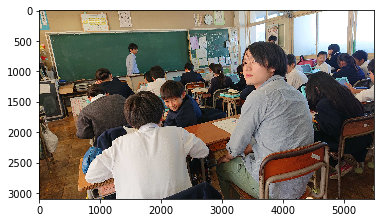

In [4]:
from PIL import Image

im = Image.open('/content/DSC_0194.JPG')

import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [5]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2020-02-05 12:21:45.426191: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-02-05 12:21:45.428961: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-05 12:21:45.429120: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1414a00 executing computations on platform Host. Devices:
2020-02-05 12:21:45.429146: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>


2020-02-05 12:21:45.491415: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm tha

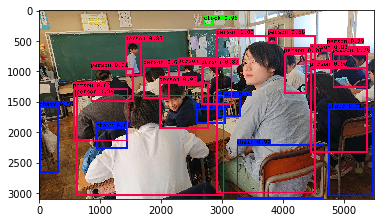

In [6]:
im = Image.open('/content/DSC_0194.JPG' + '_yolo.jpg')

import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [7]:
!python yolo_video.py --skip 10 --input /content/Untitled2.mp4 --output /content/Untitled2_yolo.mp4 > /content/Untitled2.mp4.log

Using TensorFlow backend.



2020-02-05 12:22:50.647837: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-02-05 12:22:50.650667: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-05 12:22:50.650858: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2732a00 executing computations on platform Host. Devices:
2020-02-05 12:22:50.650885: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>


2020-02-05 12:22:50.712016: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

In [8]:
!python yolo_video.py --skip 10 --input /content/Untitled.mp4 --output /content/Untitled_yolo.mp4 > Untitled_yolo.log

Using TensorFlow backend.



2020-02-05 12:25:12.750304: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-02-05 12:25:12.753095: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-05 12:25:12.753268: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x317ea00 executing computations on platform Host. Devices:
2020-02-05 12:25:12.753295: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>


2020-02-05 12:25:12.812049: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl

In [0]:
!ffmpeg -i '/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st-l00CwQ6HI_o.webm' -vcodec copy -acodec aac -ab 256k '/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st-l00CwQ6HI_o.mp4'

In [0]:
!python yolo_video.py --input '/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st-l00CwQ6HI_o.mp4' --output '/content/20190224 鹿屋体育大学 vs 鹿児島高専 1st-l00CwQ6HI_o_yolo.mp4'

In [0]:
!python yolo_video.py --step 20 --input '/content/20190224_vs_1st_trans_tKwSQIfV5q0_1080p.mp4' --output '/content/20190224_vs_1st_trans_tKwSQIfV5q0_1080p_yolo.mp4' > /content/20190224_vs_1st_trans_tKwSQIfV5q0_1080p.log